```
5G-NR Uplink Communication
│
├── Uplink Scheduling Procedures
│   ├── UE triggers SR (Scheduling Request)
│   ├── gNB sends Uplink Grant
│   ├── UE sends BSR (Buffer Status Report)
│   ├── Data transmission
│   └── HARQ feedback loop
│
├── Resource Allocation Types
│   ├── Dynamic Scheduling (per packet)
│   ├── Semi-Static Scheduling (periodic grants)
│   └── Grant-Free Uplink (low latency)
│
├── MAC Layer Protocols
│   ├── Handles multiplexing
│   ├── Manages HARQ processes
│   └── Provides data to PHY Layer
│
├── PHY Layer Interaction
│   ├── Receives transport blocks from MAC
│   ├── Performs channel coding, modulation
│   └── Physical transmission over air
│
├── RAN Architecture
│   ├── Traditional RAN: Proprietary hardware
│   ├── vRAN: Virtualized functions on COTS hardware
│   └── O-RAN: Open interfaces and vendor interoperability
│
└── Uplink Channel Characteristics
    ├── SC-FDMA: Power-efficient uplink modulation
    ├── PUCCH: (physical uplink control channel) Control info like HARQ-ACK, SR
    ├── Power control: UE transmit power regulation
    └── Channel Estimation Feedback
```

---
## Individual diagrams:

### 1. Uplink Scheduling Flow
```
[UE] -- SR (Scheduling Request) --> [gNB Scheduler]
[gNB] -- Uplink Grant --> [UE]
[UE] -- BSR (Buffer Status Report) (optional) --> [gNB]
[UE] -- Data Transmission --> [gNB]
[gNB] -- HARQ (Hybrid Automatic Repeat Request) ACK/NACK --> [UE]
```

---

#### SR: 
```
[UE has data to send?] -- No --> [Idle]
            |
           Yes
            ↓
[Does UE have uplink grant?] -- Yes --> [Transmit data]
            |
           No
            ↓
[Send Scheduling Request (SR) via PUCCH]
            ↓
[gNB Scheduler receives SR]
            ↓
[gNB sends Uplink Grant to UE]
            ↓
[UE transmits data using grant]
```


---

#### Buffer Status Report (BSR)

```
[UE checks buffer status]
            |
[Data in buffer?] -- No --> [No BSR sent]
            |
           Yes
            ↓
[Trigger BSR]
    |
    ├─ If UE gets uplink grant:
    |        ↓
    |   [Transmit BSR over MAC Control Element]
    |
    └─ If no grant:
             ↓
      [Send SR to request resources first]
             ↓
      [Wait for Uplink Grant, then send BSR]

```
- BSR reports how much data UE has in its buffer.

- Helps gNB schedule resources more efficiently.

---

#### HARQ
```
[UE transmits data (UL)]
            ↓
[gNB receives data]
            ↓
[Decoding successful?]
    |
   Yes
    ↓
[gNB sends HARQ-ACK]
    ↓
[Process complete]
    |
   No
    ↓
[gNB sends HARQ-NACK]
    ↓
[UE retransmits data with redundancy version]
    ↓
[Repeat until success or max retransmissions]
```


---

### 2 - Resource Allocation Types: 
```
                 +-----------------+
Dynamic          | Per Packet Basis|
Scheduling       +-----------------+
                        ↓
                 +-----------------+
Semi-Static      | Periodic Grants |
Scheduling       +-----------------+
                        ↓
                 +-----------------+
Grant-Free       | UE sends data   |
Uplink           | without grant   |
                 +-----------------+

```

### 3. MAC-PHY Interaction

---

```
[Higher Layers]
       ↓
+-----------------------------------+
|            MAC Layer             |
+-----------------------------------+
| - Multiplexing / Demultiplexing  |
| - Logical Channel Prioritization |
| - Scheduling of Uplink Grants    |
| - Buffer Status Report (BSR)     |
| - HARQ Management                |
| - Control Element Processing     |
| - Error Recovery & Retransmission|
+-----------------------------------+
            │
            ↓
+-----------------------------------+
|         PHY Layer                |
+-----------------------------------+
| - Channel coding                 |
| - Modulation (SC-FDMA)           |
| - Mapping to Physical Resources  |
+-----------------------------------+

```

---

#### MAC Layer Data Flow (Uplink: UE to gNB)

```
[Application Data]
        ↓
[RLC Layer] (Segmentation & Reassembly)
        ↓
[MAC Layer]
 ├─ Prioritize Logical Channels
 ├─ Generate Control Elements (BSR, Power Headroom Report)
 ├─ Manage HARQ Processes
 └─ Create Transport Blocks
        ↓
[PHY Layer]
 ├─ Channel Coding
 ├─ Modulation (SC-FDMA)
 └─ Resource Mapping
        ↓
[Over-the-Air Transmission]
        ↓
[gNB PHY Layer] → [MAC Layer Decodes TB] → [Higher Layers]

```

---

#### MAC Control vs. Data Path (Uplink, UE Perspective)

```
+-----------------------------------------------------+
|                   MAC Layer (UE)                    |
+-----------------------------------------------------+
|                                                     |
|   Control Path: MAC Control Elements                |
|   +---------------------------------------------+   |
|   | - Scheduling Request (SR) → PUCCH           |   |
|   | - Buffer Status Report (BSR) → MAC CE       |   |
|   | - Power Headroom Report (PHR) → MAC CE      |   |
|   | - HARQ Process (ACK/NACK Handling)          |   |
|   +---------------------------------------------+   |
|                                                     |
|   Data Path: User Data                              |
|   +---------------------------------------------+   |
|   | - User plane data from higher layers        |   |
|   | - Logical channel prioritization            |   |
|   | - Segmentation into MAC SDUs                |   |
|   +---------------------------------------------+   |
|                                                     |
+-------------------+---------+-----------------------+
                    ↓         ↓
          +-----------------+ +------------------+
          | PHY Layer: Ctrl | | PHY Layer: Data  |
          | - PUCCH         | | - PUSCH         |
          +-----------------+ +------------------+
                    ↓                 ↓
               Control Signals      User Data
              (SR, HARQ-ACK, etc.)  Transmission
```
---


### 4. RAN Architecture Evolution

```
Traditional RAN    vRAN             O-RAN
+-------------+    +-------------+  +-------------+
| Baseband +  |    | Baseband   |  | Open BB +   |
| RF tightly |    | virtualized|  | Open RF     |
| coupled    |    | on servers |  | Open CU/DU  |
+-------------+    +-------------+  +-------------+

```

CU: Central Unit

DU: Distributed Unit


### 5. Uplink Channel Characteristics

```
[UE]
 ├─ SC-FDMA (Low PAPR)
 ├─ PUCCH (Control Channel)
 ├─ Power Control (Transmit Power)
 └─ Channel Estimation (Feedback CSI)
       ↓
    [gNB]

```

---



---

- ### RAN = Radio Access Network

- Connects **UE (your phone)** to the **Core Network**.

- Handles radio transmission/reception, mobility, handover, and connection setup.

- In 5G, RAN components include:

  - **gNB (5G base station)**: Baseband unit + radio unit.

  - **CU (Central Unit):** Higher layer protocols (PDCP).

  - **DU (Distributed Unit):** Real-time lower layer protocols (RLC, MAC, part of PHY).
  
  - **RU (Radio Unit):** RF processing and antenna.

---

### Traditional RAN Architecture Diagram

```
[Core Network]
       │
[Baseband Unit (BBU)]
 ├─ RRC / PDCP / RLC / MAC / PHY
       │
[Radio Unit (RU)]
 ├─ RF Front-End (Amplifier, Filters)
 └─ Antennas
       │
[UE (User Equipment)]
```

- Hardware and software are tightly integrated.

- Proprietary solutions (vendor locked: Ericsson, Nokia, Huawei).

- Limited flexibility.

---

### Evolution Path: Traditional → vRAN → O-RAN

```
Traditional RAN
+---------------------------+
| Dedicated Hardware (BBU + RU) |
| Proprietary Interfaces       |
| Vendor Lock-In               |
+---------------------------+
           ↓
Virtualized RAN (vRAN)
+---------------------------+
| Baseband Functions Virtualized |
| Runs on COTS (standard servers) |
| Fronthaul still vendor-proprietary |
+---------------------------+
           ↓
Open RAN (O-RAN)
+---------------------------+
| Disaggregated Hardware/Software |
| Open interfaces (O-RAN Alliance) |
| Multi-vendor interoperability |
| Intelligence at edge (RAN Intelligent Controller) |
+---------------------------+
```

Why this matters:

- **Cost reduction**: No vendor lock-in.
- **Flexibility**: Deploy best-in-class components.
- **Edge computing & AI**: O-RAN introduces RIC (RAN Intelligent Controller).

---

### Functional Split in 5G RAN (CU/DU/RU)

```
[Core Network]
       │
[CU - Central Unit]
 ├─ Control plane (RRC)
 ├─ Packet Data Convergence Protocol (PDCP)
 └─ Service orchestration
       │ F1 interface
[DU - Distributed Unit]
 ├─ RLC (Radio Link Control)
 ├─ MAC (Medium Access Control)
 ├─ Lower PHY (HARQ, Scheduling)
       │ Fronthaul (Open fronthaul - eCPRI)
[RU - Radio Unit]
 ├─ RF Processing (Modulation, RF Power)
 └─ Antennas
       │
[UE - User Equipment]
```

Interfaces:

- **F1:** CU ↔ DU (logical split)

- **Open Fronthaul:** DU ↔ RU (O-RAN defined)

- **E2 Interface:** For RIC (O-RAN Controller)


---




---

## AI/ML in O-RAN and RIC (RAN Intelligent Controller)


### What is RIC?

- **RIC = RAN Intelligent Controller**

- Introduced in **O-RAN** to enable **AI/ML, automation, and policy control** inside the RAN.

- RIC is like the “brain” that supervises and optimizes the radio network.

- Key feature: **openness and programmability** — operators can run third-party apps ("xApps" or "rApps") to manage the network dynamically.


---

### **RIC Types**

| RIC Type                   | Functionality | Time Scale |
|----------------------------|---------------|------------|
| **Non-Real-Time RIC** (Non-RT RIC) | - Policy management<br>- AI model training<br>- Data analytics<br>- Long-term optimization | > 1 second (seconds to hours/days) |
| **Near-Real-Time RIC** (Near-RT RIC) | - Fast decisions<br>- Beamforming<br>- Traffic steering<br>- Handover decisions | ~10ms to 1 second |

**Relationship:**
- Non-RT RIC **trains models** and defines policies.
- Near-RT RIC **executes** fast actions in near real-time.

---

### **AI/ML Flow in RIC: Training to Deployment**

```
[Data Collection from RAN (gNBs, DUs, RUs)]
                  ↓
[Non-RT RIC]
 ├─ Big data analysis
 ├─ Model training (AI/ML)
 └─ Define policies & KPIs
                  ↓
[Deploy trained models and policies]
                  ↓
[Near-RT RIC]
 ├─ Executes xApps (AI/ML models)
 ├─ Makes near-real-time decisions
 ├─ Optimizes beamforming, handovers
 └─ Sends control commands to DUs / CUs
                  ↓
[RAN Nodes (DU / CU / RU)]
 └─ Apply changes in radio environment
```


Non-RT RIC **learns**, Near-RT RIC **acts**.

---

### **Visual Diagram: AI/ML in O-RAN RIC**

```
+----------------------------------+
|        Non-RT RIC                |
|  (Policy + AI Model Training)    |
|                                  |
| - Collects data from Near-RT RIC |
| - Performs long-term analysis    |
| - Trains AI models               |
| - Deploys policies & models      |
+----------------------------------+
                 ↓
      Deploy models & policies
                 ↓
+----------------------------------+
|        Near-RT RIC               |
|  (Near-Real-Time Decision-Making)|
|                                  |
| - Runs AI-powered xApps          |
| - Executes fast decisions (~10ms)|
| - Dynamic beamforming, handover  |
| - Sends control to DUs / RUs     |
+----------------------------------+
                 ↓
          Apply decisions
                 ↓
+----------------------------------+
|        RAN Components            |
| (CU / DU / RU + Antennas)        |
| - Optimize radio resources       |
| - Apply beam steering, power    |
| - Improve user experience       |
+----------------------------------+
```

---

### **Key AI/ML Use Cases in RIC**

| Use Case                         | Description |
|----------------------------------|-------------|
| 🎯 Beamforming optimization      | Dynamically adjust beam direction for better user coverage. |
| 📶 Intelligent handover control   | Predict optimal cell handovers to avoid drops. |
| ⚡ Energy efficiency management   | Put idle components to sleep, save energy. |
| 🛣️ Traffic steering               | Balance traffic across cells or slices. |
| 🛠️ Anomaly detection             | Detect equipment malfunctions early. |
| 🧩 QoS prediction                 | Predict service quality and adjust parameters. |

  
Operators can deploy **third-party xApps and rApps** to innovate and customize network behavior!



---

## **RLC**

- **RLC = Radio Link Control**

- Layer 2 protocol in 5G/NR stack.

- **Sits between PDCP (Packet Data Convergence Protocol) (upper L2) and MAC (lower L2).**

- Provides services such as:

  - Segmentation & reassembly 
  
       - (Segmentation: Breaking large data units into smaller pieces to fit transmission size limits.)
       - (Reassembly: Reconstructing the original large data unit from smaller received segments.)
       - 


  - Retransmission of lost packets

  - In-order delivery

  - Error correction

  - Duplicate detection

**Purpose:**

Ensure **reliable delivery** and **efficient handling of packets** before they go to MAC for scheduling.

---

### **RLC Modes**

| Mode             | Description | Use Case |
|------------------|-------------|-----------|
| **TM (Transparent Mode)** | No headers, no retransmission, just pass-through | Broadcast (system information) |
| **UM (Unacknowledged Mode)** | Adds headers, no retransmissions | VoIP, streaming (latency sensitive) |
| **AM (Acknowledged Mode)** | Adds headers, retransmissions with ARQ | Reliable data (eMBB, internet browsing) |

---

### **RLC Detailed Function Diagram**

```
+------------------------------------------+
|              RLC Layer                   |
+------------------------------------------+
|  - Segmentation / Reassembly             |
|  - Sequence Numbering                    |
|  - Error Correction (AM only)            |
|  - Concatenation of small SDUs           |
|  - In-order delivery                     |
|  - Duplicate detection                   |
|  - Flow control (AM mode)                |
+------------------------------------------+
            ↑                     ↓
+-----------------+     +------------------------+
| Upper Layer PDCP|     | Lower Layer: MAC Layer |
| - Ciphering     |     | - Scheduling            |
| - Header compression| | - HARQ                 |
+-----------------+     +------------------------+
```

**PDCP → RLC:**  
PDCP passes **Service Data Units (SDUs)** to RLC.

SDU (Service Data Unit): A data packet received by a protocol layer from the layer above before processing (e.g., PDCP SDU passed to RLC).


**RLC processing:**  
RLC processes SDUs → segments into **Protocol Data Units (PDUs)** → sends to MAC.

**MAC Layer:**  
MAC schedules RLC PDUs for transmission.

---

### **RLC Data Flow (Simplified UE Uplink Path)**

```
[Application Data]
       ↓
[PDCP Layer]
 - Integrity, Ciphering (Encrypting data at the PDCP layer)
       ↓
[RLC Layer]
 - Segment large PDCP SDUs
 - Add sequence numbers
 - Concatenate small packets
 - Retransmit if errors (AM mode)
       ↓
[MAC Layer]
 - Prioritize traffic
 - Add HARQ support
 - Send to PHY
       ↓
[PHY Layer]
 - Modulation & Transmission
```

---






## NR Scheduler (MathWorks)

With 5G Toolbox, you can configure an NR scheduler at the 5G base station (gNB) node using the `configureScheduler` object function of the `nrGNB` object. You can use the `Scheduler` name-value argument to specify these scheduling strategies.

**Round-robin (RR) scheduler** — Provides equal scheduling opportunities to all the UE nodes.

**Best channel quality indicator (CQI) scheduler** — Prioritizes the UE node with the best CQI.

Proportional-fair (PF) scheduler — Compromises between the round-robin and best CQI schedulers.

Custom Scheduler – Enable you to write a custom scheduling logic. To write a custom scheduler, use a subclass inherited from the `nrScheduler` class. For an example of how to write a custom scheduler, see the Use Custom Scheduler in 5G System-Level Simulation example.

https://www.mathworks.com/help/releases/R2024b/5g/ug/overview-nr-scheduler.html

https://www.mathworks.com/help/releases/R2024b/5g/ug/nr-plug-custom-scheduler-in-system-level-simulation.html


The primary role of a scheduler is to assign time and frequency resources for both uplink and downlink directions. 

It determines the timing, and allocates specific bandwidth segments for a UE node to use, when transmitting or receiving data. 

Additionally, the scheduler defines transmission characteristics, such as modulation and coding scheme (MCS) and precoder.


### Frequency Resource

Typically, a scheduler assigns frequency resources in the form of resource blocks (RBs) or resource block groups (RBGs). 

An RB is the smallest unit of frequency allocation, consisting of 12 subcarriers. 5G Toolbox supports these resource allocation types.

Resource allocation type 1 — Allocates a contiguous set of RBs to a UE node.

Resource allocation type 2 — Allows non-contiguous frequency resources for a UE node, and operates at the level of RBGs.


To set the resource allocation type, use the `ResourceAllocationType` name-value argument of the `configureScheduler` function.


### Time Resource

A scheduler typically allocates time resources in the form of slots, where each slot consists of 14 symbols. 

While the 5G specification permits symbol-level scheduling, enabling packet transmission durations smaller than a slot, 5G Toolbox does not currently support symbol-level scheduling.

--- 

For an intelligent scheduler to make efficient decisions, it relies on multiple inputs, such as 

    - buffer status, 
    - channel quality, 
    - UE capabilities.


Note that the scheduler makes independent downlink and uplink scheduling decisions on a slot-by-slot basis. 

When the scheduler executes uplink and downlink scheduling, it prioritizes meeting the retransmission needs of the UE nodes for each scheduled slot over new transmissions. 

In each scheduled slot, the scheduler performs these steps:


#### Retransmission Scheduling: 

The scheduler at the gNB node might need to schedule resources for retransmission for multiple UE nodes, with each UE node potentially having multiple packets awaiting retransmission. 

Both uplink and downlink retransmissions follow a similar process. The scheduler first selects a set of UE nodes that need retransmission for one or more packets, then creates a random order sequence of these nodes to serve their retransmission requirements. 

The scheduler then selects a packet from the first UE node in the sequence, assigns frequency resources for that packet, and moves to the next UE node in that slot. 

This process continues until the scheduler exhausts all resources or allocates resources to each UE node for retransmission once in that sequence. The scheduler performs non-adaptive retransmission, retaining the transmission characteristics of the original transmission.


### New Transmission Scheduling:  

The scheduler performs new transmission scheduling if resources remain after retransmission scheduling. Both uplink and downlink new transmissions follow a similar process. For new transmission scheduling, UE nodes must meet these criteria to be eligible.

The UE node did not get an opportunity for retransmission in the slot.

The UE node has a non-empty queued buffer with packets waiting to be transmitted.

The UE node has at least one free HARQ process available.


The scheduler executes this new transmission using strategies such as RR, PF, and best CQI. Additionally, you can customize this new transmission using the nrScheduler class.


## Uplink Scheduler

The uplink scheduler assigns physical uplink shared channel (PUSCH) grants to the UE nodes. This table illustrates the various inputs to the uplink scheduler, as supported by the 5G Toolbox.


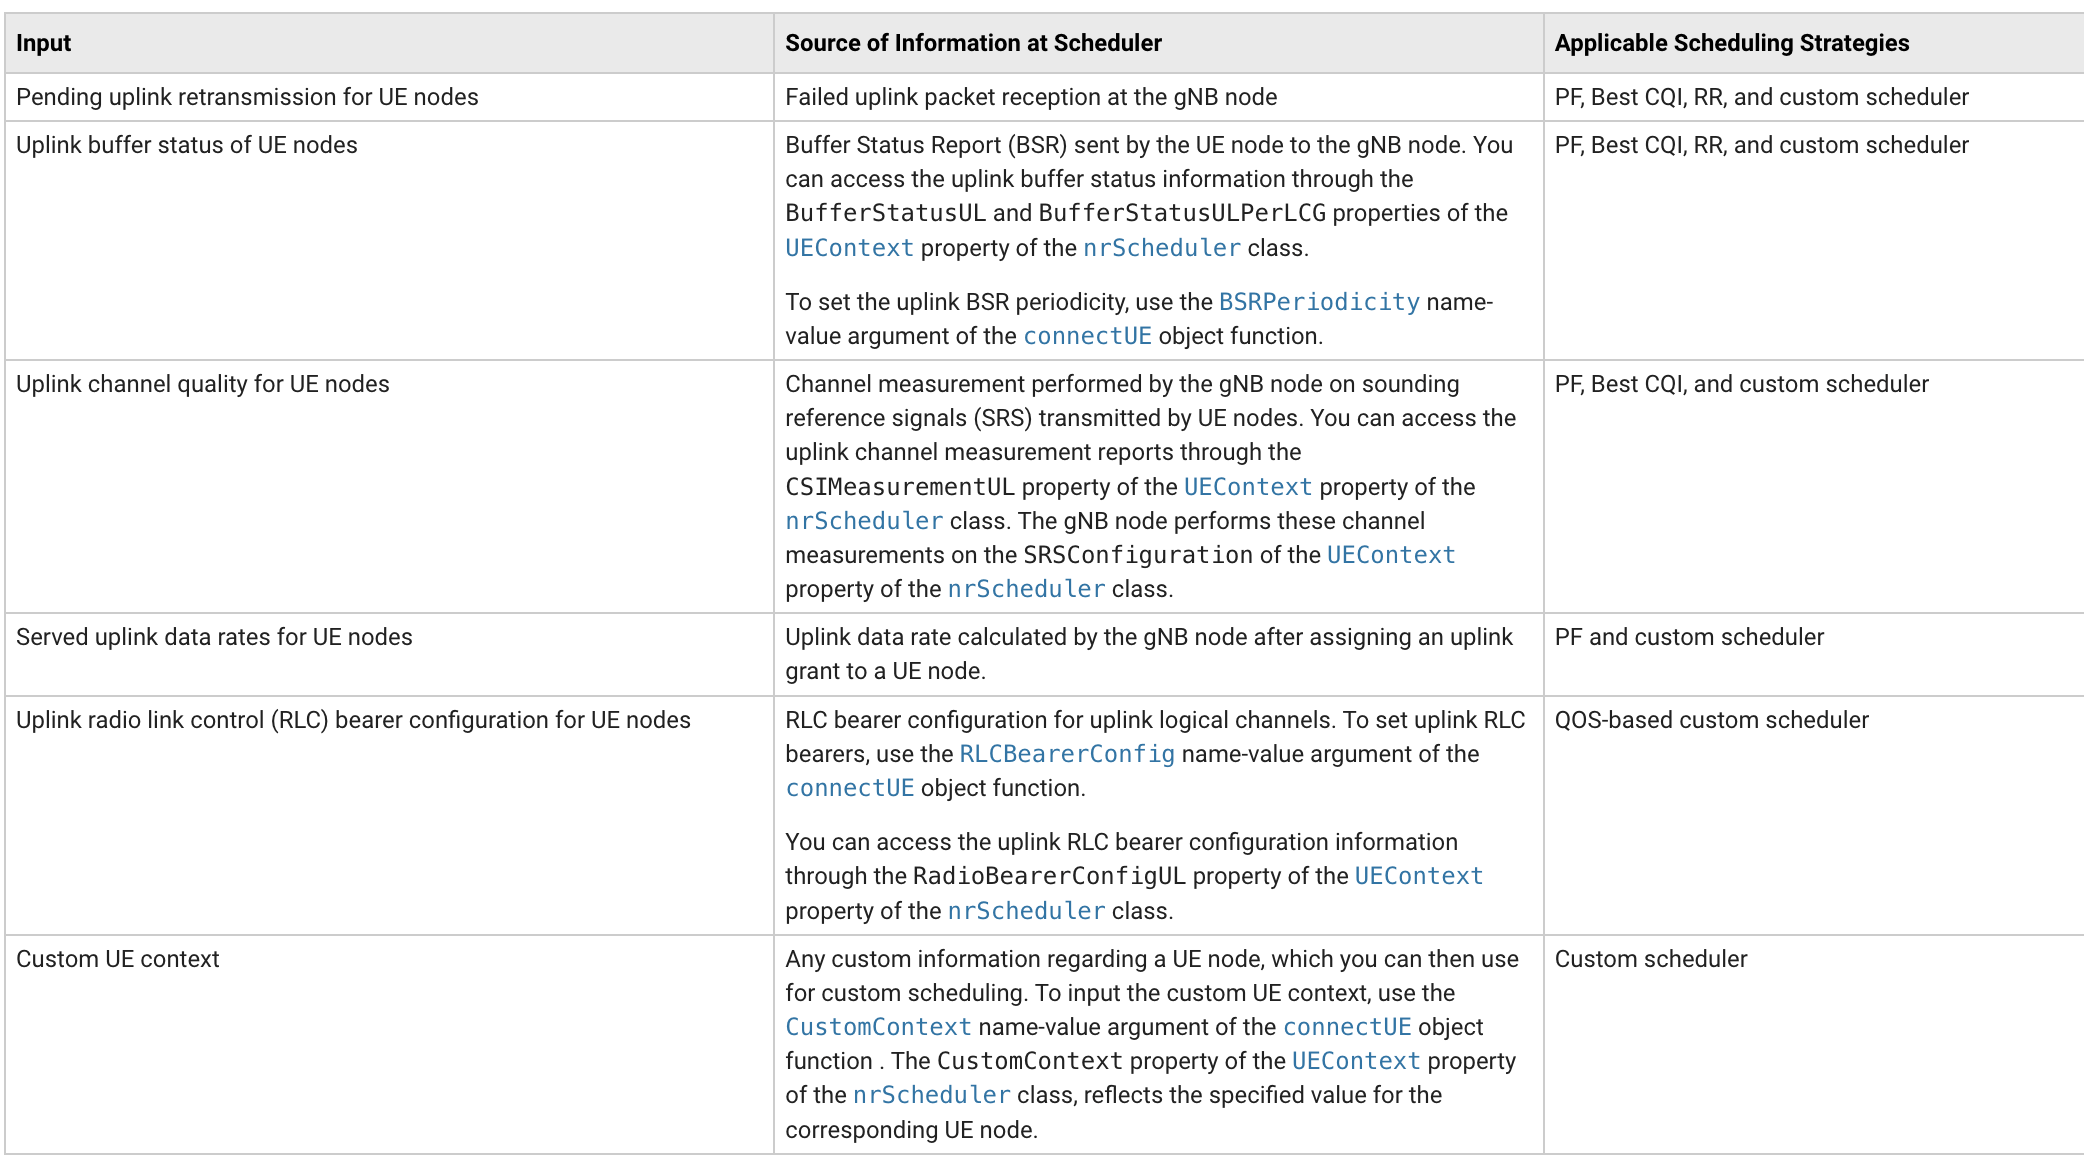


---

## Downlink Scheduler

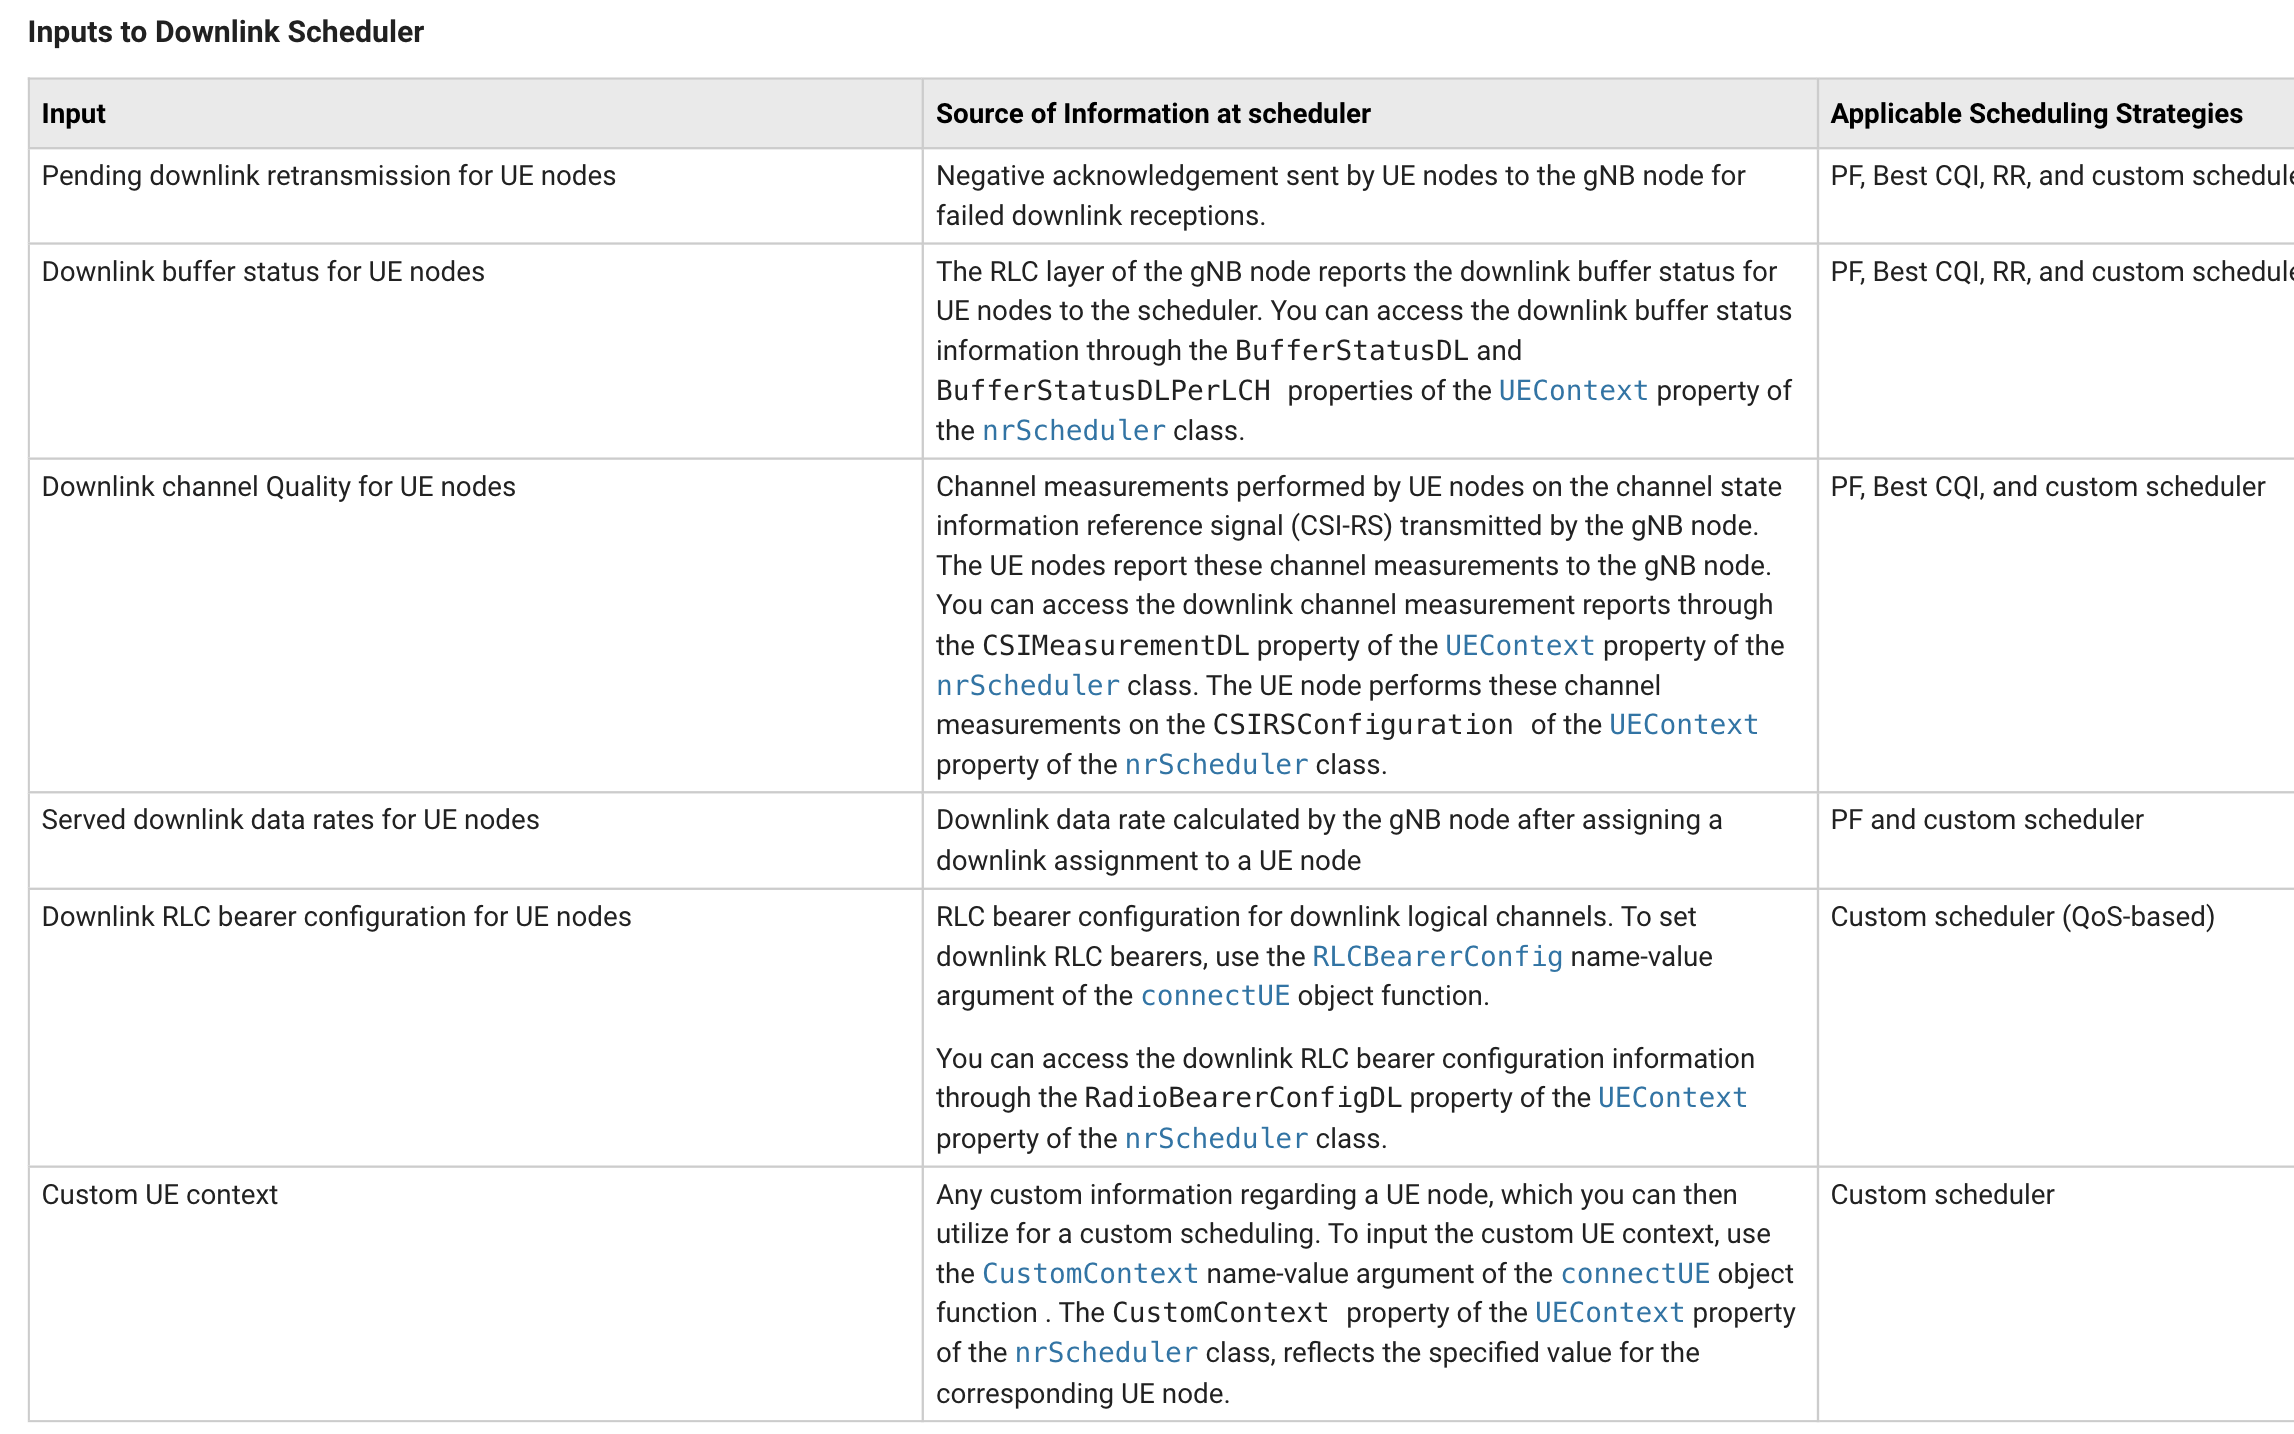

---

# Use 3GPP TR 38.901 channel model for all links 

https://www.etsi.org/deliver/etsi_tr/138900_138999/138901/16.01.00_60/tr_138901v160100p.pdf

https://www.etsi.org/deliver/etsi_ts/138300_138399/138321/16.01.00_60/ts_138321v160100p.pdf

https://www.etsi.org/deliver/etsi_ts/138300_138399/138321/16.01.00_60/ts_138321v160100p.pdf






---

### vRAN = Virtualized Radio Access Network

In **traditional RAN**, baseband processing and radio units are tightly coupled in proprietary hardware (like base station boxes from Ericsson, Nokia, Huawei).

In **vRAN**, we **decouple** baseband functions (like MAC, RLC, PDCP) from proprietary hardware and **run them as software** on commercial off-the-shelf (COTS) servers.  
The radio unit (RU) still handles radio frequency functions, but the baseband unit (BBU) becomes **virtualized**.

**Goal:** Flexible, cost-efficient, and scalable RAN deployment.



```
+-------------------------+
|       Core Network      |
+-------------------------+
             │
+-------------------------+
|         vRAN            |
+-------------------------+
| Central Unit (CU)       |
| - High Layer Processing |
| - SDAP, PDCP, Control   |
+-------------------------+
             │
+-------------------------+
| Distributed Unit (DU)   |
| - Real-time Processing  |
| - RLC, MAC, PHY (Lower) |
+-------------------------+
             │
+-------------------------+
| Radio Unit (RU)         |
| - RF Front-End          |
| - Antenna System        |
+-------------------------+
             │
          [UE]
```

---


| Component | Function |
|-----------|-----------|
| **RU (Radio Unit)** | RF signal transmission & reception (over-the-air). |
| **DU (Distributed Unit)** | Real-time Layer 1 & Layer 2 processing (e.g., MAC, RLC, part of PHY). |
| **CU (Central Unit)** | Non-real-time Layer 2 & Layer 3 processing (e.g., PDCP, control plane). |
| **vCU & vDU** | CU and DU functions running as virtual machines or containers on standard servers. |

---


- UE connects to RU over the air.
- RU sends RF signals to DU.
- DU does fast, real-time processing (MAC scheduling, HARQ, etc.).
- CU does higher-level tasks like session management, security.
- CU connects to the 5G Core for overall data handling.

---

### **Advantages of vRAN**

| Advantage | Explanation |
|-----------|-------------|
| **Cost Reduction** | Use of commercial servers instead of proprietary hardware. |
| **Flexibility** | Scale compute resources up or down dynamically. |
| **Vendor Independence** | Open interfaces enable multi-vendor deployments. |
| **Edge Computing Ready** | Deploy vRAN at the edge to reduce latency. |
| **Automation Friendly** | Integrate with orchestration tools (Kubernetes, OpenStack). |
| **Easier Upgrades** | Software-defined functions simplify updates. |

---

### **vRAN vs. Traditional RAN vs. O-RAN**

| Feature | Traditional RAN | vRAN | O-RAN |
|---------|----------------|------|--------|
| Hardware | Proprietary | COTS Servers | COTS Servers |
| Flexibility | Low | Medium | High |
| Vendor Lock-In | High | Medium | Low |
| Interfaces | Closed | Partially Open | Fully Open |
| AI/Automation | Minimal | Supported | Advanced (RIC: xApps, rApps) |

---

---

### **How does vRAN relate to your MAC scheduler interest?**

In vRAN, **MAC scheduling runs on virtualized platforms**, not fixed hardware.

- Dynamic scheduling algorithms (like Proportional Fair, Round Robin) execute on **vDU software**.

- Enables **cloud-native AI-driven scheduling**, scaling compute resources based on traffic load.

- Supports integration with **RIC** (RAN Intelligent Controller) in O-RAN architectures.

---
